In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/working-with-video-in-python-youtube-tutorial/__results__.html
/kaggle/input/working-with-video-in-python-youtube-tutorial/out_test_compressed.mp4
/kaggle/input/working-with-video-in-python-youtube-tutorial/__resultx__.html
/kaggle/input/working-with-video-in-python-youtube-tutorial/026c7465-309f6d33.mp4
/kaggle/input/working-with-video-in-python-youtube-tutorial/__notebook__.ipynb
/kaggle/input/working-with-video-in-python-youtube-tutorial/out_test.mp4
/kaggle/input/working-with-video-in-python-youtube-tutorial/__output__.json
/kaggle/input/working-with-video-in-python-youtube-tutorial/custom.css
/kaggle/input/working-with-video-in-python-youtube-tutorial/__results___files/__results___20_0.png
/kaggle/input/working-with-video-in-python-youtube-tutorial/__results___files/__results___31_0.png
/kaggle/input/working-with-video-in-python-youtube-tutorial/__results___files/__results___33_0.png
/kaggle/input/working-with-video-in-python-youtube-tutorial/__results___files/__resu

## Импорт библиотек

In [13]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from tqdm import tqdm

import subprocess

## Конвертация видео

In [14]:
input_file = '../input/driving-video-with-object-tracking/bdd100k_videos_train_00/bdd100k/videos/train/026c7465-309f6d33.mov'
subprocess.run(['ffmpeg',
                '-i',
                input_file,
                '-qscale',
                '0',
                '026c7465-309f6d33.mp4',
                '-loglevel',
                'quiet']
              )

CompletedProcess(args=['ffmpeg', '-i', '../input/driving-video-with-object-tracking/bdd100k_videos_train_00/bdd100k/videos/train/026c7465-309f6d33.mov', '-qscale', '0', '026c7465-309f6d33.mp4', '-loglevel', 'quiet'], returncode=1)

## Отображение видео

In [15]:
ipd.Video('026c7465-309f6d33.mp4', width=700)

## Метаданные

In [16]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')

cap.get(cv2.CAP_PROP_FRAME_COUNT)

2398.0

In [17]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [18]:
cap.release()

## Получаем фото из видео

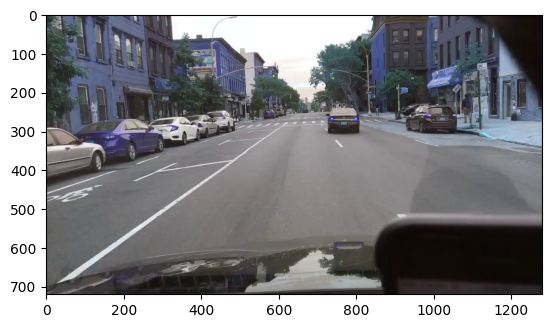

In [19]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')
ret, img = cap.read()

plt.imshow(img)

 Меняем с BGR на RGB

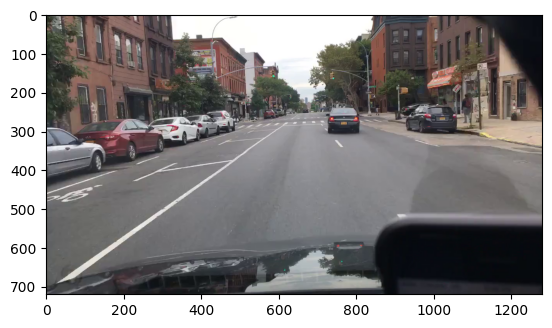

In [20]:
img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_new)

In [21]:
cap.release()

## Отображение нескольких изображений

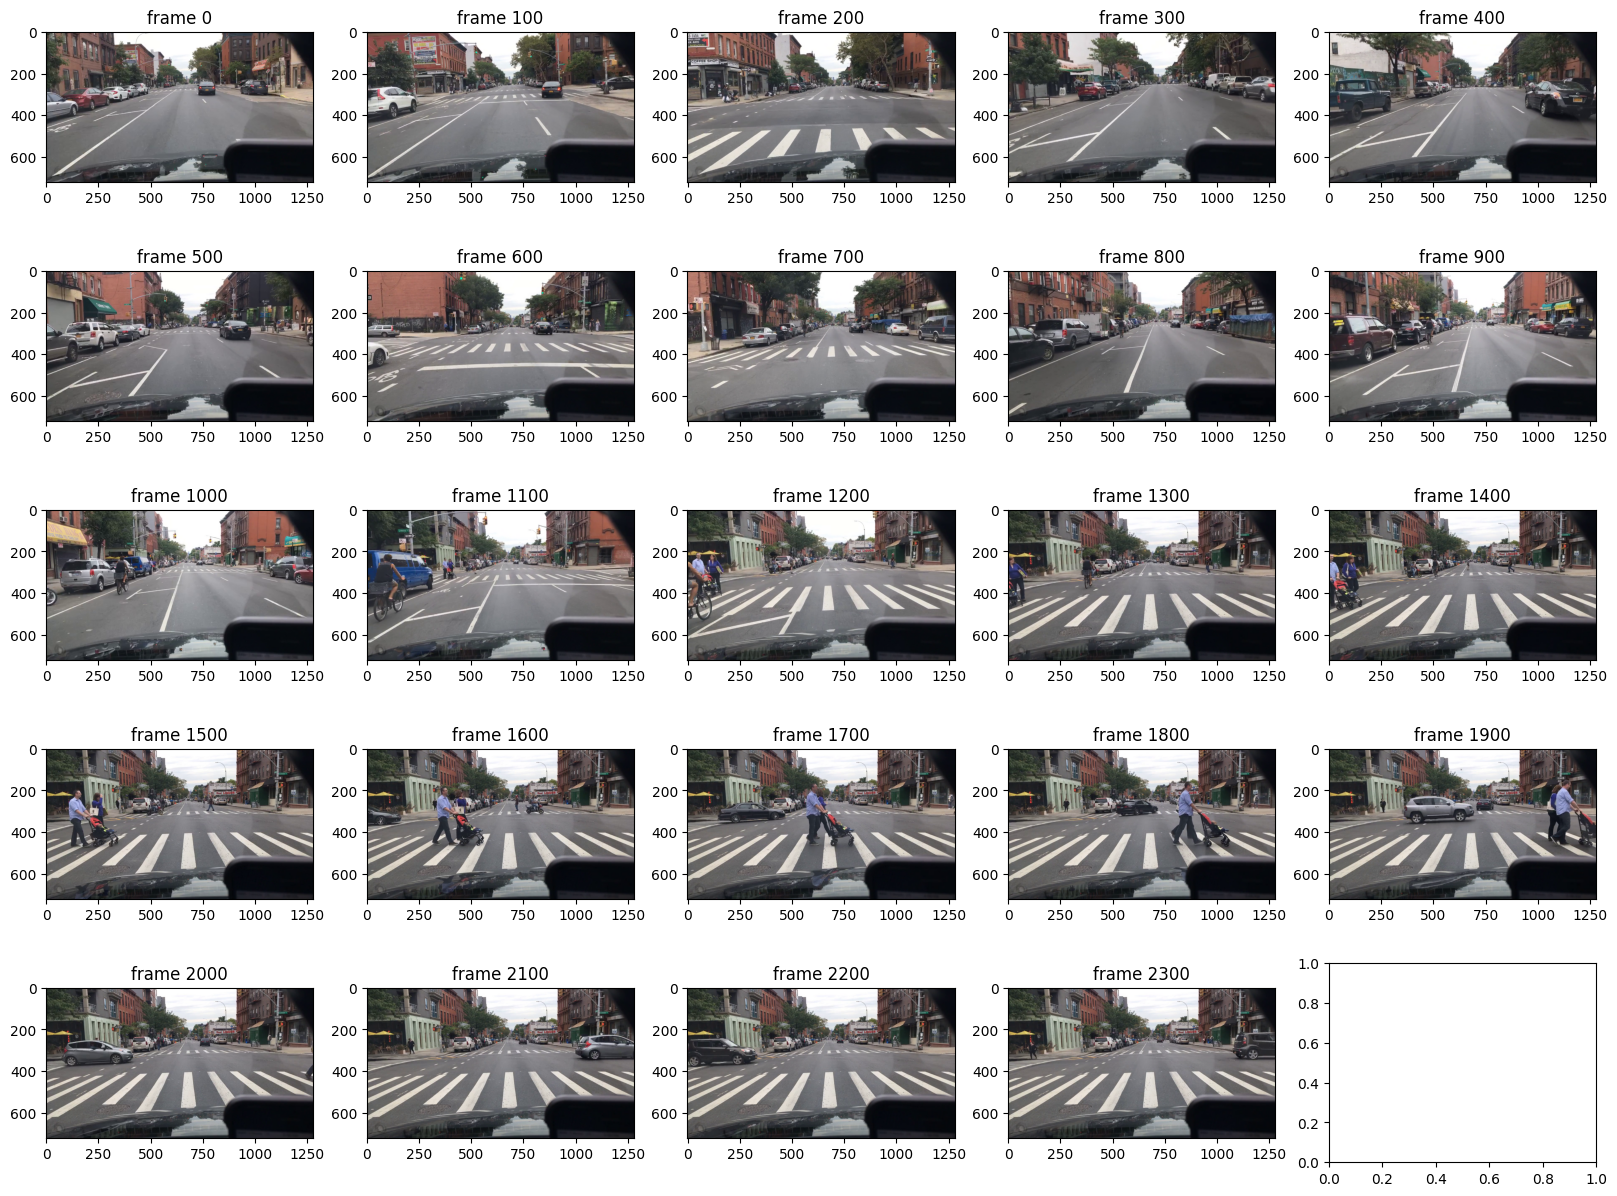

In [36]:
figure, axs = plt.subplots(5, 5, figsize=(20, 15))
axs = axs.flatten()

cap = cv2.VideoCapture('026c7465-309f6d33.mp4')


num_ax = 0
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
for i in range(int(num_frames)):
    ret, img = cap.read()
    if ret == False:
        break

    if i % 100 == 0:
        axs[num_ax].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[num_ax].set_title(f'frame {i}')
        num_ax += 1

plt.show()

## Добавление аннотаций к изображениям

In [89]:
labels = pd.read_csv('../input/driving-video-with-object-tracking/mot_labels.csv',
                     low_memory=False)
video_labels = (
    labels.query('videoName == "026c7465-309f6d33"').reset_index(drop=True).copy()
)
video_labels["video_frame"] = (video_labels["frameIndex"] * 11.9).round().astype("int")

frame_labels = video_labels[video_labels['frameIndex'] == 1249]
frame_labels.head()

Empty DataFrame
Columns: [name, videoName, frameIndex, id, category, attributes.crowd, attributes.occluded, attributes.truncated, box2d.x1, box2d.x2, box2d.y1, box2d.y2, haveVideo, video_frame]
Index: []

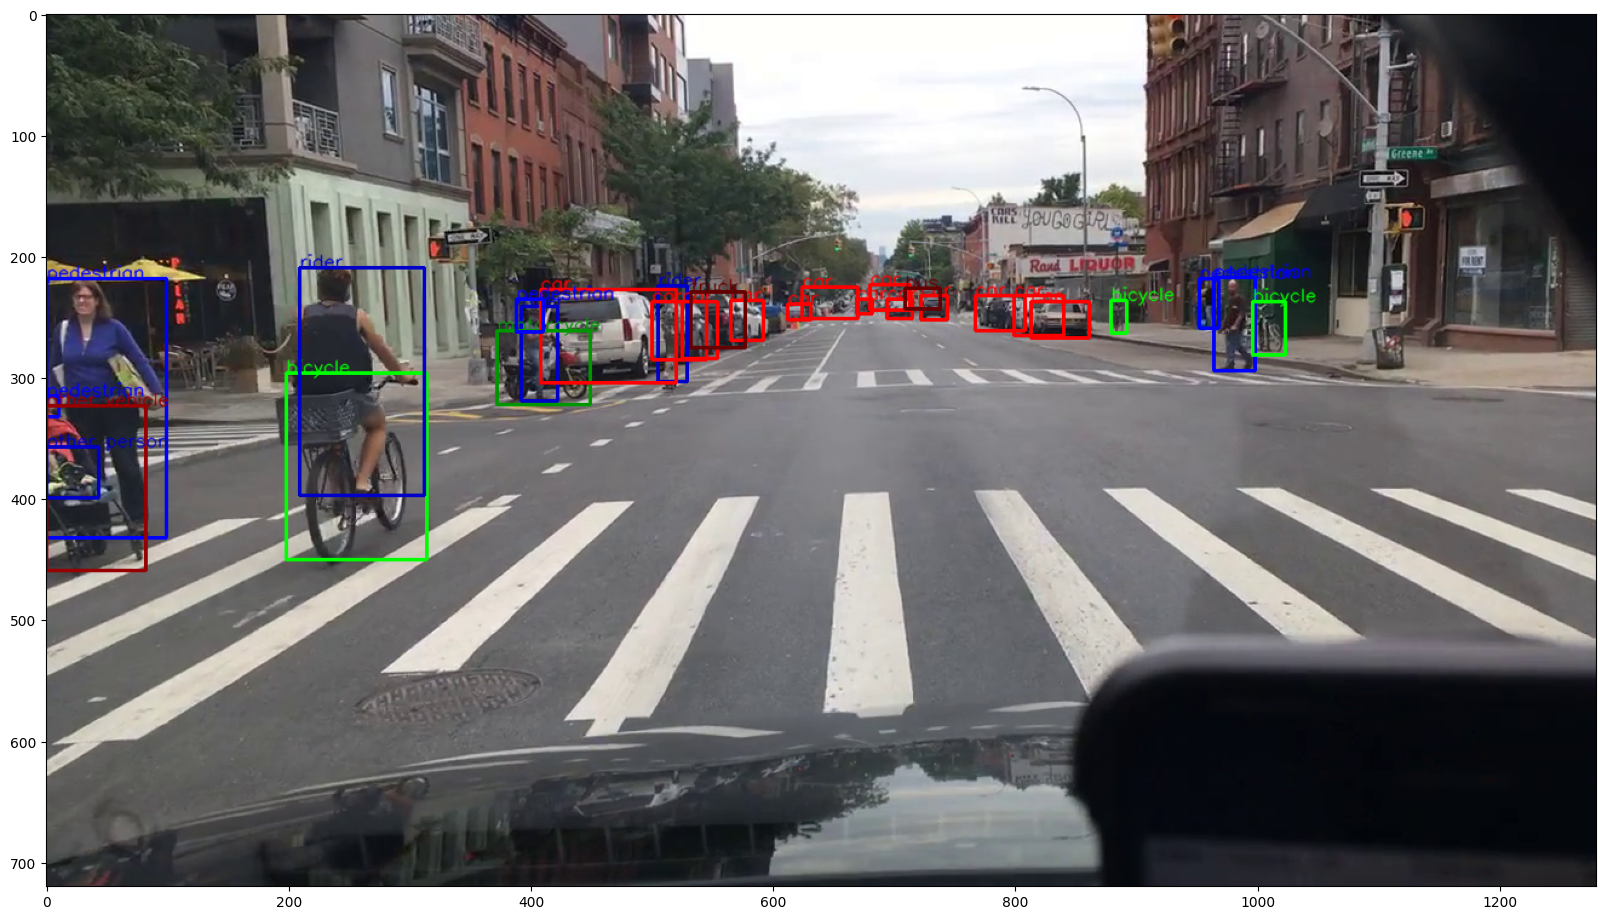

In [88]:
cap = cv2.VideoCapture('026c7465-309f6d33.mp4')

plt.figure(figsize=(20, 15))

color_map = {
    "car": (0, 0, 255),
    "truck": (0, 0, 100),
    "pedestrian": (255, 0, 0),
    "other vehicle": (0, 0, 150),
    "rider": (200, 0, 0),
    "bicycle": (0, 255, 0),
    "other person": (200, 0, 0),
    "trailer": (0, 150, 150),
    "motorcycle": (0, 150, 0),
    "bus": (0, 0, 100),
}

num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
for i in range(int(num_frames)):
    ret, img = cap.read()

    if i == 1249:
        for i, row in frame_labels.iterrows():
            pt1 = (int(row['box2d.x1']), int(row['box2d.y1']))
            pt2 = (int(row['box2d.x2']), int(row['box2d.y2']))

            img = cv2.rectangle(img, pt1, pt2, color=color_map[row['category']], thickness=2)
            img = cv2.putText(img, row['category'], pt1, cv2.FONT_HERSHEY_SIMPLEX, 
                   0.5, color_map[row['category']], 1, cv2.LINE_AA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()
        break

## Сохранение видео

In [101]:
def img_segment(frame, img):
    frame_labels = video_labels[video_labels['video_frame'] == frame]
    if frame_labels.empty:
        return False, None
    for i, row in frame_labels.iterrows():
        pt1 = (int(row['box2d.x1']), int(row['box2d.y1']))
        pt2 = (int(row['box2d.x2']), int(row['box2d.y2']))

        img = cv2.rectangle(img, pt1, pt2, color=color_map[row['category']], thickness=2)
        img = cv2.putText(img, row['category'], pt1, cv2.FONT_HERSHEY_SIMPLEX, 
               0.5, color_map[row['category']], 1, cv2.LINE_AA)

    return True, img

In [103]:
VIDEO_CODEC = "mp4v"
fps = 59.94
width = 1280
height = 720
out = cv2.VideoWriter("out_test.mp4",
                cv2.VideoWriter_fourcc(*VIDEO_CODEC),
                fps,
                (width, height))


cap = cv2.VideoCapture('026c7465-309f6d33.mp4')
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
for i in tqdm(range(int(num_frames))):
    ret, img = cap.read()
    if ret == False:
        break

    img_out = img_segment(i, img)
    if img_out[0]:
        out.write(img_out[1])


out.release()
cap.release()

100%|██████████| 2398/2398 [00:08<00:00, 294.69it/s]


In [105]:
tmp_output_path = "out_test.mp4"
output_path = "out_test_compressed.mp4"
subprocess.run(
    [
        "ffmpeg",
        "-i",
        tmp_output_path,
        "-crf",
        "18",
        "-preset",
        "veryfast",
        "-vcodec",
        "libx264",
        output_path,
        '-loglevel',
        'quiet'
    ]
)

CompletedProcess(args=['ffmpeg', '-i', 'out_test.mp4', '-crf', '18', '-preset', 'veryfast', '-vcodec', 'libx264', 'out_test_compressed.mp4', '-loglevel', 'quiet'], returncode=0)

In [106]:
ipd.Video('out_test_compressed.mp4', width=700)